In [19]:
# Dependencies
import pandas as pd
from config import api_key
from census import Census
from us import states
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn chart style
sns.set()

# Increase the size of the charts
plt.rcParams["figure.figsize"] = [10,8]

In [2]:
# Mark's data

In [3]:
# Mark's graphs

In [4]:
# Eric's data

In [5]:
# Eric's graphs

In [6]:
# Amanda's data

In [7]:
# Amanda's graphs

In [2]:
# Spencer's data

def GetMajorData(year, gender, age, total, eng, other_eng, bus, ed, other):
# This function gets census data for majors by age and gender.
    
    # Make connection with Census
    response = Census(api_key)
    
    # Do the API call
    census_data = response.acs5.get(('NAME', total, eng, other_eng, bus, ed, other), {'for': 'us:*'})

    # Convert to DataFrame
    census_data = pd.DataFrame(census_data)

    # Column Reordering
    census_data = census_data.rename(columns={"NAME": "Name", total: "Total",eng: "Eng", 
                                              other_eng: "Other Eng", bus: "Bus", ed: "Ed",
                                              other: "Other"})

    # Rename columns
    census_data = census_data[["Name", "Total", "Eng", "Other Eng", "Bus", "Ed", "Other"]]
    
    # Create new columns
    census_data["Total Eng"] = census_data["Eng"] + census_data["Other Eng"]
    census_data["% Eng"] = round(census_data["Total Eng"] / census_data["Total"] * 100, 1)
    census_data["% Bus"] = round(census_data["Bus"] / census_data["Total"] * 100, 1)
    census_data["% Ed"] = round(census_data["Ed"] / census_data["Total"] * 100, 1)
    census_data["% Other"] = round(census_data["Other"] / census_data["Total"] * 100, 1)
    census_data["Name"] = gender + " " + age
    
    #Return final dataframe
    return (census_data)

In [3]:
# Get data for males & females, age groups 25-39, 40-64 and 65+
M2539_census_data = GetMajorData(2016, "Male", "25-39", 'B15011_003E', 'B15011_004E', 'B15011_005E', 'B15011_006E', 
                                       'B15011_007E', 'B15011_008E')
M4064_census_data = GetMajorData(2016, "Male", "40-64", 'B15011_009E', 'B15011_010E', 'B15011_011E', 'B15011_012E', 
                                       'B15011_013E', 'B15011_014E')
M65_census_data = GetMajorData(2016, "Male", "65+", 'B15011_015E', 'B15011_016E', 'B15011_017E', 'B15011_018E', 
                                       'B15011_019E', 'B15011_020E')
F2539_census_data = GetMajorData(2016, "Female", "25-39", 'B15011_022E', 'B15011_023E', 'B15011_024E', 'B15011_025E', 
                                       'B15011_026E', 'B15011_027E')
F4064_census_data = GetMajorData(2016, "Female", "40-64", 'B15011_028E', 'B15011_029E', 'B15011_030E', 'B15011_031E', 
                                       'B15011_032E', 'B15011_033E')
F65_census_data = GetMajorData(2016, "Female", "65+", 'B15011_034E', 'B15011_035E', 'B15011_036E', 'B15011_037E', 
                                       'B15011_038E', 'B15011_039E')

# Combine all dataframes together
combined_df = M2539_census_data.append(M4064_census_data, ignore_index=True)
combined_df = combined_df.append(M65_census_data, ignore_index=True)
combined_df = combined_df.append(F2539_census_data, ignore_index=True)
combined_df = combined_df.append(F4064_census_data, ignore_index=True)
combined_df = combined_df.append(F65_census_data, ignore_index=True)
combined_df

,Name,Total,Eng,Other Eng,Bus,Ed,Other,Total Eng,% Eng,% Bus,% Ed,% Other
0,Male 25-39,9626485.0,4247668.0,514041.0,2198814.0,381198.0,2284764.0,4761709.0,49.5,22.8,4.0,23.7
1,Male 40-64,15187133.0,6615673.0,884947.0,3821869.0,899547.0,2965097.0,7500620.0,49.4,25.2,5.9,19.5
2,Male 65+,6250906.0,2742613.0,331770.0,1393268.0,720399.0,1062856.0,3074383.0,49.2,22.3,11.5,17.0
3,Female 25-39,11908897.0,3748414.0,1384061.0,2130571.0,1427004.0,3218847.0,5132475.0,43.1,17.9,12.0,27.0
4,Female 40-64,16491728.0,4166904.0,2218959.0,3253751.0,2997847.0,3854267.0,6385863.0,38.7,19.7,18.2,23.4
5,Female 65+,5302638.0,956074.0,655498.0,434062.0,1977125.0,1279879.0,1611572.0,30.4,8.2,37.3,24.1


In [4]:
# Format columns and reindex on name
combined_df["Total"] = combined_df["Total"].map("{:,.2f}".format)
combined_df["Eng"] = combined_df["Eng"].map("{:,.2f}".format)
combined_df["Other Eng"] = combined_df["Other Eng"].map("{:,.2f}".format)
combined_df["Bus"] = combined_df["Bus"].map("{:,.2f}".format)
combined_df["Ed"] = combined_df["Ed"].map("{:,.2f}".format)
combined_df["Other"] = combined_df["Other"].map("{:,.2f}".format)
combined_df["Total Eng"] = combined_df["Total Eng"].map("{:,.2f}".format)
combined_df.set_index("Name", inplace=True)
combined_df

,Total,Eng,Other Eng,Bus,Ed,Other,Total Eng,% Eng,% Bus,% Ed,% Other
Name,,,,,,,,,,,
Male 25-39,"9,626,485.00","4,247,668.00","514,041.00","2,198,814.00","381,198.00","2,284,764.00","4,761,709.00",49.5,22.8,4.0,23.7
Male 40-64,"15,187,133.00","6,615,673.00","884,947.00","3,821,869.00","899,547.00","2,965,097.00","7,500,620.00",49.4,25.2,5.9,19.5
Male 65+,"6,250,906.00","2,742,613.00","331,770.00","1,393,268.00","720,399.00","1,062,856.00","3,074,383.00",49.2,22.3,11.5,17.0
Female 25-39,"11,908,897.00","3,748,414.00","1,384,061.00","2,130,571.00","1,427,004.00","3,218,847.00","5,132,475.00",43.1,17.9,12.0,27.0
Female 40-64,"16,491,728.00","4,166,904.00","2,218,959.00","3,253,751.00","2,997,847.00","3,854,267.00","6,385,863.00",38.7,19.7,18.2,23.4
Female 65+,"5,302,638.00","956,074.00","655,498.00","434,062.00","1,977,125.00","1,279,879.00","1,611,572.00",30.4,8.2,37.3,24.1


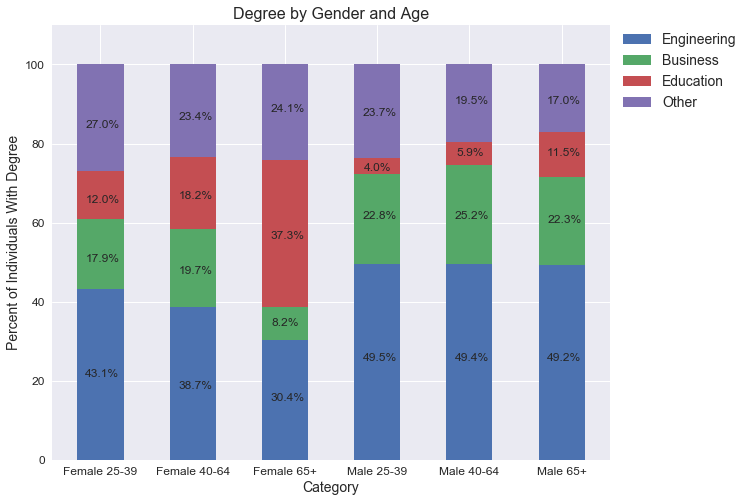

In [5]:
# Spencer's graphs
# This section print a stacked bar chart for each major by gender/age category

# Clear plots
plt.clf()

# Set the width of the bars
width = 0.5 

# Create bar plots for each degree
p1 = plt.bar(combined_df.index, combined_df["% Eng"], width)
p2 = plt.bar(combined_df.index, combined_df["% Bus"], width, bottom=combined_df["% Eng"])
p3 = plt.bar(combined_df.index, combined_df["% Ed"], width, bottom=combined_df["% Eng"]+combined_df["% Bus"])
p4 = plt.bar(combined_df.index, combined_df["% Other"], width, bottom=combined_df["% Eng"]+combined_df["% Bus"]+combined_df["% Ed"])

# Format chart items
plt.ylim(0, 110)
plt.ylabel('Percent of Individuals With Degree', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.title('Degree by Gender and Age', fontsize=16)
plt.tick_params(labelsize=12)
plt.legend(('Engineering', 'Business', 'Education', 'Other'), bbox_to_anchor=(1.25, 1.01), prop={'size': 14})

# Add labels for values
plt.text(-0.165, 21, f"{combined_df.loc['Female 25-39', '% Eng']}%")
plt.text(-0.165, 50, f"{combined_df.loc['Female 25-39', '% Bus']}%")
plt.text(-0.165, 65, f"{combined_df.loc['Female 25-39', '% Ed']}%")
plt.text(-0.165, 84, f"{combined_df.loc['Female 25-39', '% Other']}%")

plt.text(0.845, 18, f"{combined_df.loc['Female 40-64', '% Eng']}%")
plt.text(0.845, 47, f"{combined_df.loc['Female 40-64', '% Bus']}%")
plt.text(0.845, 66, f"{combined_df.loc['Female 40-64', '% Ed']}%")
plt.text(0.845, 86, f"{combined_df.loc['Female 40-64', '% Other']}%")

plt.text(1.84, 15, f"{combined_df.loc['Female 65+', '% Eng']}%")
plt.text(1.85, 34, f"{combined_df.loc['Female 65+', '% Bus']}%")
plt.text(1.84, 56, f"{combined_df.loc['Female 65+', '% Ed']}%")
plt.text(1.84, 88, f"{combined_df.loc['Female 65+', '% Other']}%")

plt.text(2.84, 25, f"{combined_df.loc['Male 25-39', '% Eng']}%")
plt.text(2.84, 61, f"{combined_df.loc['Male 25-39', '% Bus']}%")
plt.text(2.86, 73, f"{combined_df.loc['Male 25-39', '% Ed']}%")
plt.text(2.84, 87, f"{combined_df.loc['Male 25-39', '% Other']}%")

plt.text(3.84, 25, f"{combined_df.loc['Male 40-64', '% Eng']}%")
plt.text(3.84, 61, f"{combined_df.loc['Male 40-64', '% Bus']}%")
plt.text(3.86, 77, f"{combined_df.loc['Male 40-64', '% Ed']}%")
plt.text(3.84, 90, f"{combined_df.loc['Male 40-64', '% Other']}%")

plt.text(4.84, 25, f"{combined_df.loc['Male 65+', '% Eng']}%")
plt.text(4.85, 60, f"{combined_df.loc['Male 65+', '% Bus']}%")
plt.text(4.84, 77, f"{combined_df.loc['Male 65+', '% Ed']}%")
plt.text(4.84, 90, f"{combined_df.loc['Male 65+', '% Other']}%")

# Save the figure
plt.savefig("DegreeBreakdown.png")

# Display chart
plt.show()

In [6]:
def GetEngineerData(gender, year, census_total, census_eng, census_other_eng):
# This function gets census data for just engineering degrees

    # Make connection with Census
    response = Census(api_key, year=year)

    # Do the API call
    census_data = response.acs5.get(('NAME', census_total, census_eng, census_other_eng), {'for': 'us:*'})

    # Convert to DataFrame
    census_data = pd.DataFrame(census_data)

    # Rename columns
    census_data = census_data.rename(columns={"NAME": "Name", census_total: "Total", 
                                              census_eng: "Eng", census_other_eng: "Other Eng"})

    # Reorder columns
    census_data = census_data[["Name", "Total", "Eng", "Other Eng"]]
    census_data["Total Eng"] = census_data["Eng"] + census_data["Other Eng"]
    census_data["% Eng"] = round(census_data["Total Eng"] / census_data["Total"] * 100, 1)
    census_data["Name"] = gender + " 25-39 " + str(year)
    
    # Return final dataframe
    return(census_data)

In [7]:
# Census codes for engineering degrees for males 25-39
m_2539_total = 'B15011_003E'
m_2539_eng = 'B15011_004E'
m_2539_other = 'B15011_005E'

M2013_census_data = GetEngineerData("Male", 2013, m_2539_total, m_2539_eng, m_2539_other)
M2014_census_data = GetEngineerData("Male", 2014, m_2539_total, m_2539_eng, m_2539_other)
M2015_census_data = GetEngineerData("Male", 2015, m_2539_total, m_2539_eng, m_2539_other)
M2016_census_data = GetEngineerData("Male", 2016, m_2539_total, m_2539_eng, m_2539_other)

# Combine dataframes and reindex
male_combined_df = M2013_census_data.append(M2014_census_data, ignore_index=True)
male_combined_df = male_combined_df.append(M2015_census_data, ignore_index=True)
male_combined_df = male_combined_df.append(M2016_census_data, ignore_index=True)
male_combined_df.set_index("Name", inplace=True)
male_combined_df

,Total,Eng,Other Eng,Total Eng,% Eng
Name,,,,,
Male 25-39 2013,8867045.0,3910592.0,464932.0,4375524.0,49.3
Male 25-39 2014,9059703.0,3986449.0,480278.0,4466727.0,49.3
Male 25-39 2015,9336099.0,4105456.0,495166.0,4600622.0,49.3
Male 25-39 2016,9626485.0,4247668.0,514041.0,4761709.0,49.5


In [8]:
# Census codes for engineering degrees for females 25-39
f_2539_total = 'B15011_022E'
f_2539_eng = 'B15011_023E'
f_2539_other = 'B15011_024E'

F2013_census_data = GetEngineerData("Female", 2013, f_2539_total, f_2539_eng, f_2539_other)
F2014_census_data = GetEngineerData("Female", 2014, f_2539_total, f_2539_eng, f_2539_other)
F2015_census_data = GetEngineerData("Female", 2015, f_2539_total, f_2539_eng, f_2539_other)
F2016_census_data = GetEngineerData("Female", 2016, f_2539_total, f_2539_eng, f_2539_other)

# Combine dataframes and reindex
female_combined_df = F2013_census_data.append(F2014_census_data, ignore_index=True)
female_combined_df = female_combined_df.append(F2015_census_data, ignore_index=True)
female_combined_df = female_combined_df.append(F2016_census_data, ignore_index=True)
female_combined_df.set_index("Name", inplace=True)
female_combined_df

,Total,Eng,Other Eng,Total Eng,% Eng
Name,,,,,
Female 25-39 2013,10976414.0,3443083.0,1197444.0,4640527.0,42.3
Female 25-39 2014,11246878.0,3529045.0,1248125.0,4777170.0,42.5
Female 25-39 2015,11560649.0,3636300.0,1311601.0,4947901.0,42.8
Female 25-39 2016,11908897.0,3748414.0,1384061.0,5132475.0,43.1


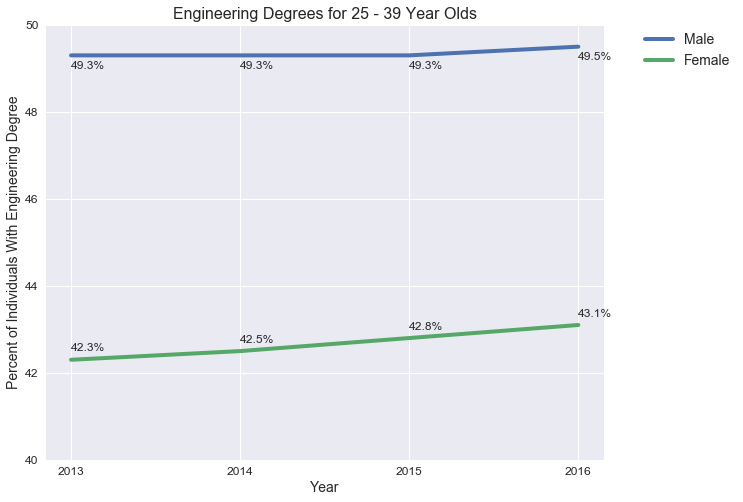

In [20]:
# Clear plots
plt.clf()

# Create plots
plt.plot(["2013","2014","2015","2016"], male_combined_df["% Eng"], linewidth = 4)
plt.plot(["2013","2014","2015","2016"], female_combined_df["% Eng"], linewidth = 4)

# Format plots
plt.ylim(40, 50)
plt.ylabel('Percent of Individuals With Engineering Degree', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Engineering Degrees for 25 - 39 Year Olds', fontsize=16)
plt.tick_params(labelsize=12)
plt.legend(('Male', 'Female'), bbox_to_anchor=(1.25, 1.01), prop={'size': 14})

# Add value labels
plt.text(0, 49, f"{male_combined_df.loc['Male 25-39 2013', '% Eng']}%")
plt.text(1, 49, f"{male_combined_df.loc['Male 25-39 2014', '% Eng']}%")
plt.text(2, 49, f"{male_combined_df.loc['Male 25-39 2015', '% Eng']}%")
plt.text(3, 49.2, f"{male_combined_df.loc['Male 25-39 2016', '% Eng']}%")

plt.text(0, 42.5, f"{female_combined_df.loc['Female 25-39 2013', '% Eng']}%")
plt.text(1, 42.7, f"{female_combined_df.loc['Female 25-39 2014', '% Eng']}%")
plt.text(2, 43, f"{female_combined_df.loc['Female 25-39 2015', '% Eng']}%")
plt.text(3, 43.3, f"{female_combined_df.loc['Female 25-39 2016', '% Eng']}%")

# Save the figure
plt.savefig("EngineeringBreakdown.png")

# Display chart
plt.show()                              

In [10]:
# This section gets engineer majors for males and females ages 25-39 by state

# Establish API connection
response = Census(api_key, year=2016)

# Do the API call
M2539_state_data = response.acs5.get(('NAME', 'B15011_003E', 'B15011_004E', 'B15011_005E'), {'for': 'state:*'})

# Convert to DataFrame
M2539_state_data = pd.DataFrame(M2539_state_data)

# Rename columns
M2539_state_data = M2539_state_data.rename(columns={"NAME": "Name", 'B15011_003E': "Total", 
                                          'B15011_004E': "Eng", 'B15011_005E': "Other Eng"})

# Reorder columns
M2539_state_data = M2539_state_data[["Name", "Total", "Eng", "Other Eng"]]
M2539_state_data["Total Eng"] = M2539_state_data["Eng"] + M2539_state_data["Other Eng"]
M2539_state_data["% Eng"] = round(M2539_state_data["Total Eng"] / M2539_state_data["Total"] * 100, 1)

# Do the API call
F2539_state_data = response.acs5.get(('NAME', 'B15011_022E', 'B15011_023E', 'B15011_024E'), {'for': 'state:*'})

# Convert to DataFrame
F2539_state_data = pd.DataFrame(F2539_state_data)

# Rename columns
F2539_state_data = F2539_state_data.rename(columns={"NAME": "Name", 'B15011_022E': "Total", 
                                          'B15011_023E': "Eng", 'B15011_024E': "Other Eng"})

# Reorder columns
F2539_state_data = F2539_state_data[["Name", "Total", "Eng", "Other Eng"]]
F2539_state_data["Total Eng"] = F2539_state_data["Eng"] + F2539_state_data["Other Eng"]
F2539_state_data["% Eng"] = round(F2539_state_data["Total Eng"] / F2539_state_data["Total"] * 100, 1)

In [11]:
# Merge state level dataframes
state_data = pd.merge(M2539_state_data[["Name", "% Eng"]], F2539_state_data[["Name", "% Eng"]], on="Name")

# Rename columns
state_data = state_data.rename(columns={'% Eng_x': "Male % Eng", '% Eng_y': "Female % Eng"})

state_data["Gap"] = state_data["Male % Eng"] - state_data["Female % Eng"]

# Sort dataframe
state_data = state_data.sort_values("Gap", ascending=False)

# Calculate the states with the largest and smallest difference between males and females
max_gap = state_data.iloc[0,:]
min_gap = state_data.iloc[state_data.shape[0]-1,:]

# Sort dataframe
state_data = state_data.sort_values("Male % Eng", ascending=False)

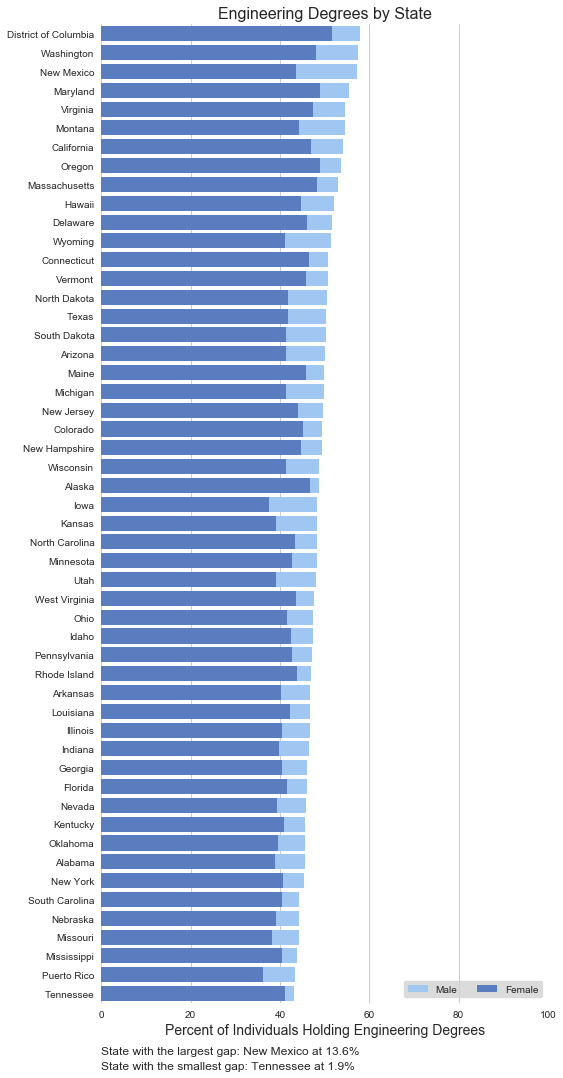

In [28]:
# Set seaborn style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 18))

# Plot the % of male engineers by state
sns.set_color_codes("pastel")
sns.barplot(x=state_data["Male % Eng"], y=state_data["Name"], data=state_data, label="Male", color="b")

# Plot the % of female engineers by state
sns.set_color_codes("muted")
sns.barplot(x=state_data["Female % Eng"], y=state_data["Name"], data=state_data, label="Female", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True, facecolor='lightgray')
ax.set(xlim=(0, 100), ylabel="")
ax.set_xlabel("Percent of Individuals Holding Engineering Degrees", fontdict={'fontsize' : 14})
plt.title('Engineering Degrees by State', fontsize=16)
sns.despine(left=True, bottom=True)

# Display states with largest and smallest gaps
plt.text(0, 54.2, f"State with the largest gap: {max_gap['Name']} at {max_gap['Gap']:,.1f}%")
plt.text(0, 55, f"State with the smallest gap: {min_gap['Name']} at {min_gap['Gap']:,.1f}%")

# Show chart
plt.show()